In [1]:
import Voting_rules
import fairness_metric
import os
import pandas as pd
import numpy as np
from votekit import pref_profile
import matplotlib.pyplot as plt
from votekit.cvr_loaders import load_scottish
from fairness_metric import sigma_IIA, sigma_UF
from Voting_rules import Ranked_Borda, Ranked_Plurality
from votekit.cvr_loaders import load_scottish  # your load function for Scottish profiles
import matplotlib.patches as mpatches

Code for experiments on Scottish election data

In [3]:
#Select the relevant directory and print the current working directory
import os
os.getcwd()
os.chdir('/Users/ss2776/Desktop/fairness_project/scot-elex/4_cands')
#os.listdir()

In [ ]:
#Check metrics on a single scottish profile

from fairness_metric import sigma_UF, sigma_IIA
from Voting_rules import Ranked_Borda, Ranked_Plurality
scottish_profile, seats, cand_list, cand_to_party, ward = load_scottish("moray_2012_ward7.csv")

sigma_IIA(scottish_profile, Ranked_Plurality)

0.8333333333333334

In [ ]:



# Full Experiment: σIIA 



# 1. Base path
base_path = '/Users/ss2776/Desktop/fairness_project/scot-elex/'

# 2. Storage for results
records = []

# 3. Loop over folders 3_cands to 14_cands
for num_cands in range(3, 15):
    folder_path = os.path.join(base_path, f"{num_cands}_cands")
    
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist, skipping.")
        continue

    files = os.listdir(folder_path)
    
    for file in files:
        if file.endswith('.csv'):
            try:
                full_path = os.path.join(folder_path, file)
                
                # Load election profile
                scottish_profile, seats, cand_list, cand_to_party, ward = load_scottish(full_path)
                
                # Compute σIIA metrics
                sigma_plurality = sigma_IIA(scottish_profile, Ranked_Plurality)
                sigma_borda = sigma_IIA(scottish_profile, Ranked_Borda)
                
                # Record the results
                records.append({
                    "Num_Candidates": num_cands,
                    "Voting_Rule": "Plurality",
                    "Sigma_IIA": sigma_plurality,
                    "File": file.replace(".csv", "")
                })
                records.append({
                    "Num_Candidates": num_cands,
                    "Voting_Rule": "Borda",
                    "Sigma_IIA": sigma_borda,
                    "File": file.replace(".csv", "")
                })
            
            except Exception as e:
                print(f"Error processing {file}: {e}")

# 4. Create results DataFrame
results_df = pd.DataFrame(records)

# 5. Save results to Downloads
results_csv_path = "/Users/ss2776/Downloads/sigma_IIA_experiment_results.csv"
results_df.to_csv(results_csv_path, index=False)
print(f"Results saved to: {results_csv_path}")




In [ ]:
#Creating a more refined dataframe with the council, year and ward names

import pandas as pd

# --- Step 1: Load your results file ---
results_csv_path = "/Users/ss2776/Documents/sigma_IIA_experiment_results.csv"
results_df = pd.read_csv(results_csv_path)

# --- Step 2: Full splitter for all councils ---
def split_file_name(file_name):
    parts = file_name.replace(".csv", "").split("_")
    
    # Handle councils with multiple words
    if parts[0] == "eilean" and parts[1] == "siar":
        council = "eilean_siar"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "sc" and parts[1] == "borders":
        council = "sc_borders"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "dumgal":
        council = "dumgal"
        year = parts[1]
        ward = "_".join(parts[2:])
    elif parts[0] == "perth" and parts[1] == "kinross":
        council = "perth_kinross"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "argyll" and parts[1] == "bute":
        council = "argyll_bute"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "east" and parts[1] == "ayrshire":
        council = "east_ayrshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "east" and parts[1] == "dunbartonshire":
        council = "east_dunbartonshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "east" and parts[1] == "lothian":
        council = "east_lothian"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "east" and parts[1] == "renfrewshire":
        council = "east_renfrewshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "south" and parts[1] == "ayrshire":
        council = "south_ayrshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "south" and parts[1] == "lanarkshire":
        council = "south_lanarkshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "north" and parts[1] == "ayrshire":
        council = "north_ayrshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "north" and parts[1] == "lanarkshire":
        council = "north_lanarkshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "west" and parts[1] == "dunbartonshire":
        council = "west_dunbartonshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "west" and parts[1] == "lothian":
        council = "west_lothian"
        year = parts[2]
        ward = "_".join(parts[3:])
    else:
        # Normal councils (aberdeen, aberdeenshire, angus, glasgow, etc.)
        council = parts[0]
        year = parts[1]
        ward = "_".join(parts[2:])
        
    return council, int(year), ward

# --- Step 3: Apply the splitting ---
results_df[["Council", "Year", "Ward"]] = results_df["File"].apply(lambda x: pd.Series(split_file_name(x)))

# --- Step 4: Pivot Voting Rules into columns ---
pivot_df = results_df.pivot_table(
    index=["Year", "Council", "Ward", "Num_Candidates"],
    columns="Voting_Rule",
    values="Sigma_IIA"
).reset_index()

# --- Step 5: Rename for clarity ---
pivot_df = pivot_df.rename(columns={
    "Borda": "Sigma_IIA_Borda",
    "Plurality": "Sigma_IIA_Plurality"
})

# --- Step 6: Save final clean file ---
pivot_df.to_csv("/Users/ss2776/Documents/Borda_Plurality_IIA_Scottish.csv", index=False)



 Cleaned results with Num_Candidates saved as Complete_IIA_Scottish.csv!


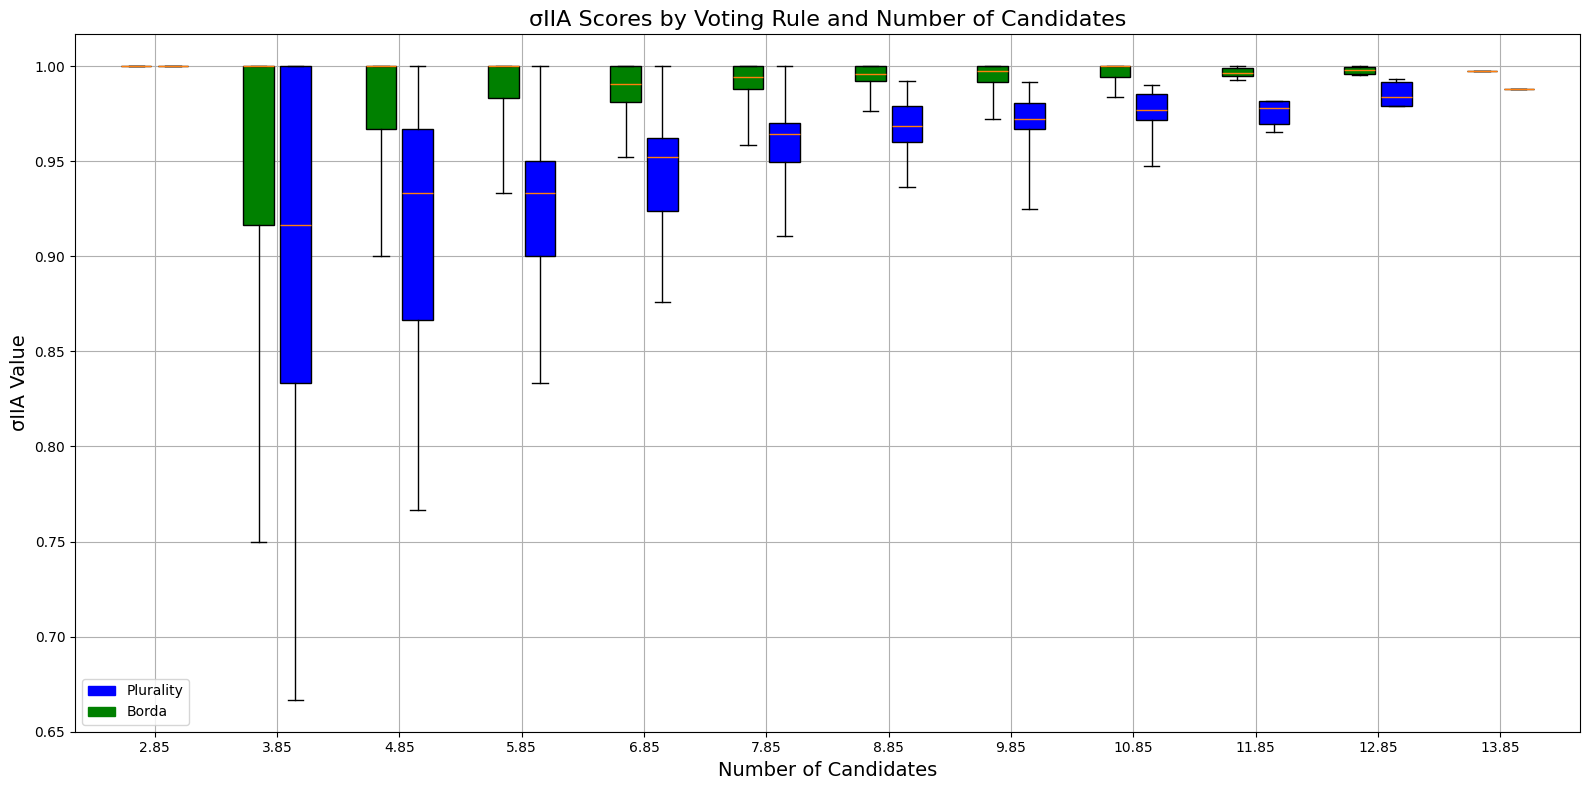

In [43]:
#Making the boxplot

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


df = pd.read_csv('/Users/ss2776/Documents/Borda_Plurality_IIA_Scottish.csv')  # Example path


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 0. Assume your df looks like this:
# Columns: ['Year', 'Council', 'Ward', 'Num_Candidates', 'Sigma_IIA_Borda', 'Sigma_IIA_Plurality']

# 1. Prepare figure
fig, ax = plt.subplots(figsize=(16, 8))

# 2. Unique sorted number of candidates
candidate_counts = sorted(df['Num_Candidates'].unique())

# 3. Plotting
positions_borda = [x - 0.15 for x in candidate_counts]  # Shift Borda left
positions_plurality = [x + 0.15 for x in candidate_counts]  # Shift Plurality right

# Boxplots for Borda
borda_data = [df[df['Num_Candidates'] == n]['Sigma_IIA_Borda'].dropna() for n in candidate_counts]
bp_borda = ax.boxplot(borda_data, positions=positions_borda, widths=0.25, whis= [1,99], showfliers= False, patch_artist=True)

# Boxplots for Plurality
plurality_data = [df[df['Num_Candidates'] == n]['Sigma_IIA_Plurality'].dropna() for n in candidate_counts]
bp_plurality = ax.boxplot(plurality_data, positions=positions_plurality, widths=0.25, whis= [1,99], showfliers= False, patch_artist=True)

# 4. Color the boxplots manually
for patch in bp_borda['boxes']:
    patch.set_facecolor('green')

for patch in bp_plurality['boxes']:
    patch.set_facecolor('blue')

# 5. Set labels and title
ax.set_xlabel('Number of Candidates', fontsize=14)
ax.set_ylabel('σIIA Value', fontsize=14)
ax.set_title('σIIA Scores by Voting Rule and Number of Candidates', fontsize=16)
ax.set_xticks(candidate_counts)
ax.grid(True)

# 6. Create manual legend
plurality_patch = mpatches.Patch(color='blue', label='Plurality')
borda_patch = mpatches.Patch(color='green', label='Borda')
ax.legend(handles=[plurality_patch, borda_patch])

# 7. Show plot
plt.tight_layout()
plt.show()



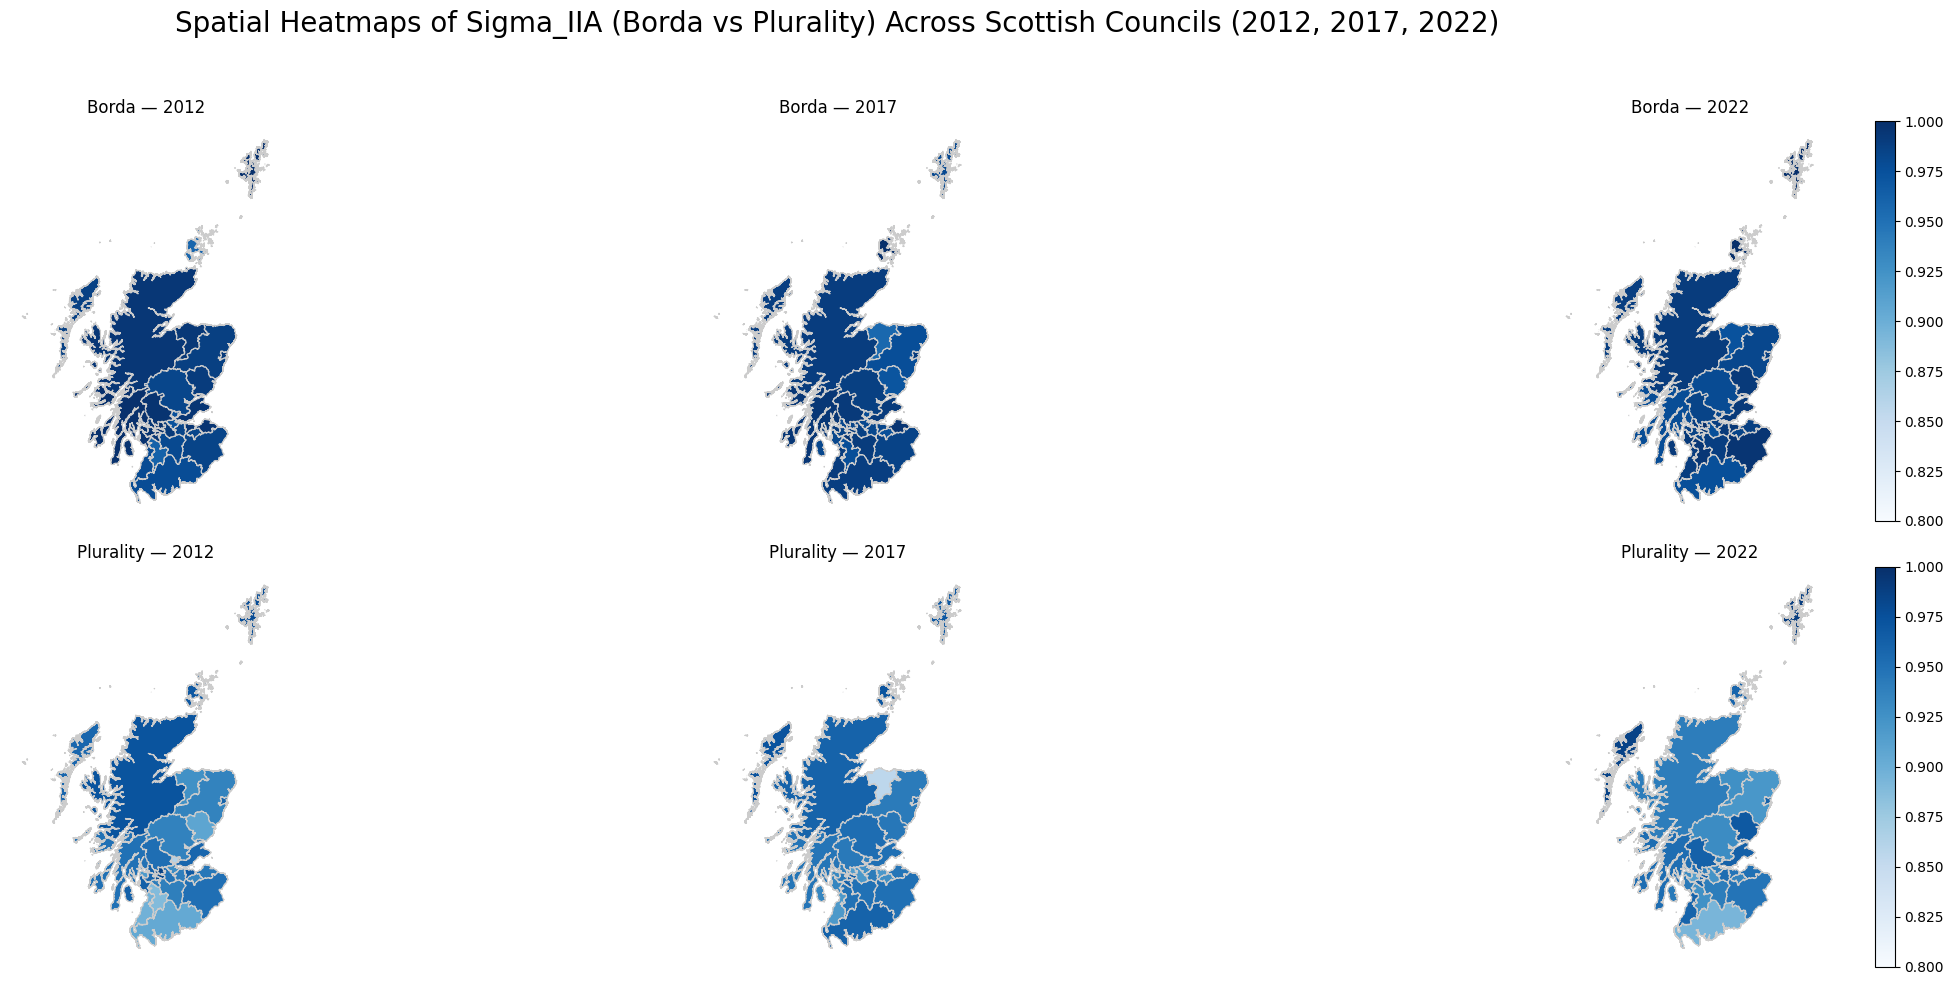

In [58]:


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 0. Load your main DataFrame
df = pd.read_csv('/Users/ss2776/Documents/Borda_Plurality_IIA_Scottish.csv')

# 1. Compute average Sigma_IIA values per Council-Year
council_year_avg = df.groupby(['Council', 'Year']).agg({
    'Sigma_IIA_Borda': 'mean',
    'Sigma_IIA_Plurality': 'mean'
}).reset_index()

# 2. Define mapping from short council codes to full names used in GeoJSON
name_map = {
    'aberdeen': 'Aberdeen City',
    'aberdeenshire': 'Aberdeenshire',
    'angus': 'Angus',
    'argyll_bute': 'Argyll and Bute',
    'clackmannanshire': 'Clackmannanshire',
    'dumgal': 'Dumfries and Galloway',
    'dundee': 'Dundee City',
    'east_ayrshire': 'East Ayrshire',
    'east_dunbartonshire': 'East Dunbartonshire',
    'east_lothian': 'East Lothian',
    'east_renfrewshire': 'East Renfrewshire',
    'edinburgh': 'City of Edinburgh',
    'eilean_siar': 'Eilean Siar',
    'falkirk': 'Falkirk',
    'fife': 'Fife',
    'glasgow': 'Glasgow City',
    'highland': 'Highland',
    'inverclyde': 'Inverclyde',
    'midlothian': 'Midlothian',
    'moray': 'Moray',
    'north_ayrshire': 'North Ayrshire',
    'north_lanarkshire': 'North Lanarkshire',
    'orkney': 'Orkney Islands',
    'perth_kinross': 'Perth and Kinross',
    'renfrewshire': 'Renfrewshire',
    'sc_borders': 'Scottish Borders',
    'shetland': 'Shetland Islands',
    'south_ayrshire': 'South Ayrshire',
    'south_lanarkshire': 'South Lanarkshire',
    'stirling': 'Stirling',
    'west_dunbartonshire': 'West Dunbartonshire',
    'west_lothian': 'West Lothian'
}

# 3. Expand Council-Year combinations to full grid
full_grid = pd.MultiIndex.from_product(
    [df['Council'].unique(), [2012, 2017, 2022]],  # Only years 2012, 2017, 2022
    names=['Council', 'Year']
).to_frame(index=False)

council_year_avg_full = full_grid.merge(
    council_year_avg,
    on=['Council', 'Year'],
    how='left'
)

council_year_avg_full['Full_Council_Name'] = council_year_avg_full['Council'].map(name_map)

# 4. Load the Scotland GeoJSON
gdf = gpd.read_file('/Users/ss2776/Downloads/lad.json')  # Adjust path if needed

# 5. Prepare years and metrics
years = [2012, 2017, 2022]
metrics = ['Sigma_IIA_Borda', 'Sigma_IIA_Plurality']

# 6. Set fixed vmin and vmax manually
vmin = 0.8
vmax = 1.0

# 7. Create 6-panel plot (2 rows x 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(24, 10))  # 2 rows (Borda/Plurality) × 3 columns (Years)

for i, metric in enumerate(metrics):  # Row: 0 = Borda, 1 = Plurality
    for j, year in enumerate(years):  # Column: Years
        # Filter fairness data for the year
        year_data = council_year_avg_full[council_year_avg_full['Year'] == year]

        # Merge with spatial data
        merged_gdf = gdf.merge(
            year_data,
            left_on='LAD13NM',
            right_on='Full_Council_Name',
            how='left'
        )

        # Plot
        ax = axs[i, j]
        merged_gdf.plot(
            column=metric,
            cmap='Blues',
            linewidth=0.8,
            edgecolor='0.8',
            legend=(j == 2),  # Show legend only on last column
            ax=ax,
            vmin=vmin,
            vmax=vmax
        )

        # Titles
        metric_name = 'Borda' if metric == 'Sigma_IIA_Borda' else 'Plurality'
        ax.set_title(f'{metric_name} — {year}', fontsize=12)
        ax.axis('off')

# 8. Global title and layout
plt.suptitle('Spatial Heatmaps of Sigma_IIA (Borda vs Plurality) Across Scottish Councils (2012, 2017, 2022)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle

# 9. Optional: Save to file
# plt.savefig("Sigma_IIA_Scotland_Heatmaps_2012_2017_2022_fixedscale.png", dpi=300, bbox_inches='tight')

plt.show()


In [46]:




# Full Experiment: σUF 

from fairness_metric import sigma_UF



# 1. Base path
base_path = '/Users/ss2776/Desktop/fairness_project/scot-elex/'

# 2. Storage for results
records = []

# 3. Loop over folders 3_cands to 14_cands
for num_cands in range(3, 15):
    folder_path = os.path.join(base_path, f"{num_cands}_cands")
    
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist, skipping.")
        continue

    files = os.listdir(folder_path)
    
    for file in files:
        if file.endswith('.csv'):
            try:
                full_path = os.path.join(folder_path, file)
                
                # Load election profile
                scottish_profile, seats, cand_list, cand_to_party, ward = load_scottish(full_path)
                
                # Compute σUF metrics
                sigma_plurality = sigma_UF(scottish_profile, Ranked_Plurality)
                sigma_borda = sigma_UF(scottish_profile, Ranked_Borda)
                
                # Record the results
                records.append({
                    "Num_Candidates": num_cands,
                    "Voting_Rule": "Plurality",
                    "Sigma_UF": sigma_plurality,
                    "File": file.replace(".csv", "")
                })
                records.append({
                    "Num_Candidates": num_cands,
                    "Voting_Rule": "Borda",
                    "Sigma_UF": sigma_borda,
                    "File": file.replace(".csv", "")
                })
            
            except Exception as e:
                print(f"Error processing {file}: {e}")

# 4. Create results DataFrame
results_df = pd.DataFrame(records)

# 5. Save results to Downloads
results_csv_path = "/Users/ss2776/Downloads/Scottish_sigma_UF_experiment_results.csv"
results_df.to_csv(results_csv_path, index=False)
print(f"Results saved to: {results_csv_path}")


Results saved to: /Users/ss2776/Downloads/Scottish_sigma_UF_experiment_results.csv


In [47]:
#Creating a more refined dataframe with the council, year and ward names

import pandas as pd

# --- Step 1: Load your results file ---
results_csv_path = "/Users/ss2776/Downloads/Scottish_sigma_UF_experiment_results.csv"
results_df = pd.read_csv(results_csv_path)

# --- Step 2: Full splitter for all councils ---
def split_file_name(file_name):
    parts = file_name.replace(".csv", "").split("_")
    
    # Handle councils with multiple words
    if parts[0] == "eilean" and parts[1] == "siar":
        council = "eilean_siar"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "sc" and parts[1] == "borders":
        council = "sc_borders"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "dumgal":
        council = "dumgal"
        year = parts[1]
        ward = "_".join(parts[2:])
    elif parts[0] == "perth" and parts[1] == "kinross":
        council = "perth_kinross"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "argyll" and parts[1] == "bute":
        council = "argyll_bute"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "east" and parts[1] == "ayrshire":
        council = "east_ayrshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "east" and parts[1] == "dunbartonshire":
        council = "east_dunbartonshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "east" and parts[1] == "lothian":
        council = "east_lothian"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "east" and parts[1] == "renfrewshire":
        council = "east_renfrewshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "south" and parts[1] == "ayrshire":
        council = "south_ayrshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "south" and parts[1] == "lanarkshire":
        council = "south_lanarkshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "north" and parts[1] == "ayrshire":
        council = "north_ayrshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "north" and parts[1] == "lanarkshire":
        council = "north_lanarkshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "west" and parts[1] == "dunbartonshire":
        council = "west_dunbartonshire"
        year = parts[2]
        ward = "_".join(parts[3:])
    elif parts[0] == "west" and parts[1] == "lothian":
        council = "west_lothian"
        year = parts[2]
        ward = "_".join(parts[3:])
    else:
        # Normal councils (aberdeen, aberdeenshire, angus, glasgow, etc.)
        council = parts[0]
        year = parts[1]
        ward = "_".join(parts[2:])
        
    return council, int(year), ward

# --- Step 3: Apply the splitting ---
results_df[["Council", "Year", "Ward"]] = results_df["File"].apply(lambda x: pd.Series(split_file_name(x)))

# --- Step 4: Pivot Voting Rules into columns ---
pivot_df = results_df.pivot_table(
    index=["Year", "Council", "Ward", "Num_Candidates"],
    columns="Voting_Rule",
    values="Sigma_UF"
).reset_index()

# --- Step 5: Rename for clarity ---
pivot_df = pivot_df.rename(columns={
    "Borda": "Sigma_UF_Borda",
    "Plurality": "Sigma_UF_Plurality"
})

# --- Step 6: Save final clean file ---
pivot_df.to_csv("/Users/ss2776/Documents/Borda_Plurality_UF_Scottish.csv", index=False)

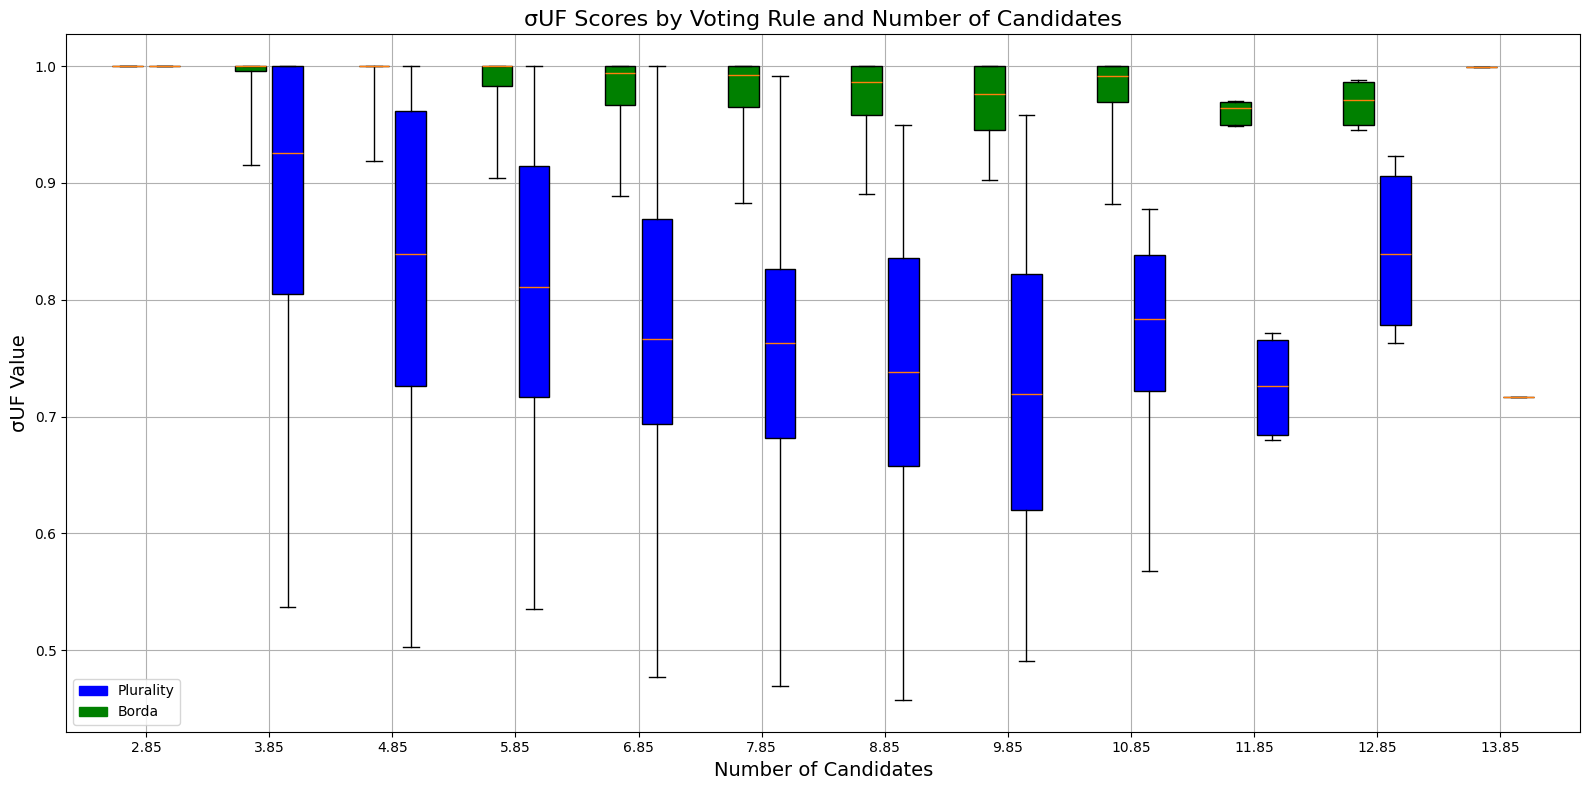

In [51]:
#Making the boxplot

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


df = pd.read_csv('/Users/ss2776/Documents/Borda_Plurality_UF_Scottish.csv')  # Example path


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 0. Assume your df looks like this:
# Columns: ['Year', 'Council', 'Ward', 'Num_Candidates', 'Sigma_UF_Borda', 'Sigma_UF_Plurality']

# 1. Prepare figure
fig, ax = plt.subplots(figsize=(16, 8))

# 2. Unique sorted number of candidates
candidate_counts = sorted(df['Num_Candidates'].unique())

# 3. Plotting
positions_borda = [x - 0.15 for x in candidate_counts]  # Shift Borda left
positions_plurality = [x + 0.15 for x in candidate_counts]  # Shift Plurality right

# Boxplots for Borda
borda_data = [df[df['Num_Candidates'] == n]['Sigma_UF_Borda'].dropna() for n in candidate_counts]
bp_borda = ax.boxplot(borda_data, positions=positions_borda, widths=0.25, whis= [1,99], showfliers= False, patch_artist=True)

# Boxplots for Plurality
plurality_data = [df[df['Num_Candidates'] == n]['Sigma_UF_Plurality'].dropna() for n in candidate_counts]
bp_plurality = ax.boxplot(plurality_data, positions=positions_plurality, widths=0.25, whis= [1,99], showfliers= False, patch_artist=True)

# 4. Color the boxplots manually
for patch in bp_borda['boxes']:
    patch.set_facecolor('green')

for patch in bp_plurality['boxes']:
    patch.set_facecolor('blue')

# 5. Set labels and title
ax.set_xlabel('Number of Candidates', fontsize=14)
ax.set_ylabel('σUF Value', fontsize=14)
ax.set_title('σUF Scores by Voting Rule and Number of Candidates', fontsize=16)
ax.set_xticks(candidate_counts)
ax.grid(True)

# 6. Create manual legend
plurality_patch = mpatches.Patch(color='blue', label='Plurality')
borda_patch = mpatches.Patch(color='green', label='Borda')
ax.legend(handles=[plurality_patch, borda_patch])

# 7. Show plot
plt.tight_layout()
plt.show()

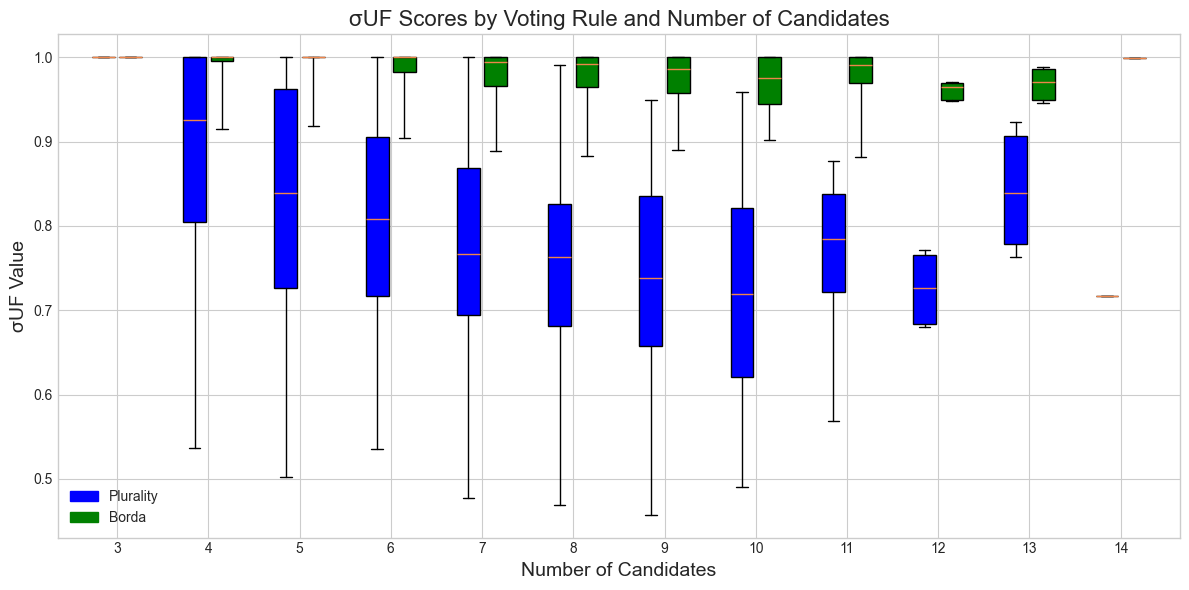

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# 1. Load your saved results
results_csv_path = "/Users/ss2776/Downloads/sigma_uf_experiment_results.csv"
results_df = pd.read_csv(results_csv_path)

# 2. Create boxplots for σUF by number of candidates

plt.figure(figsize=(12, 6))

# Prepare data for boxplots
plurality_data = [
    results_df[(results_df["Voting_Rule"] == "Plurality") & 
               (results_df["Num_Candidates"] == n)]["Sigma_UF"].dropna()
    for n in range(3, 15)
]

borda_data = [
    results_df[(results_df["Voting_Rule"] == "Borda") & 
               (results_df["Num_Candidates"] == n)]["Sigma_UF"].dropna()
    for n in range(3, 15)
]

positions_plurality = np.array(range(3, 15)) - 0.15
positions_borda = np.array(range(3, 15)) + 0.15

# Plot boxplots
# Plurality (blue)
plt.boxplot(
    plurality_data,
    positions=positions_plurality,
    widths=0.25,
    patch_artist=True,
    boxprops=dict(facecolor="blue"),
    whis=[1, 99],
    showfliers=False
)

# Borda (green)
plt.boxplot(
    borda_data,
    positions=positions_borda,
    widths=0.25,
    patch_artist=True,
    boxprops=dict(facecolor="green"),
    whis=[1, 99],
    showfliers=False
)

# 3. Custom legend (to match colors)
plurality_patch = mpatches.Patch(color="blue", label="Plurality")
borda_patch = mpatches.Patch(color="green", label="Borda")
plt.legend(handles=[plurality_patch, borda_patch], loc="best")

# 4. Labels and title
plt.xticks(range(3, 15), labels=[str(n) for n in range(3, 15)])
plt.xlabel("Number of Candidates", fontsize=14)
plt.ylabel("σUF Value", fontsize=14)
plt.title("σUF Scores by Voting Rule and Number of Candidates", fontsize=16)
plt.grid(True)
plt.tight_layout()

# 5. Show the plot
plt.show()


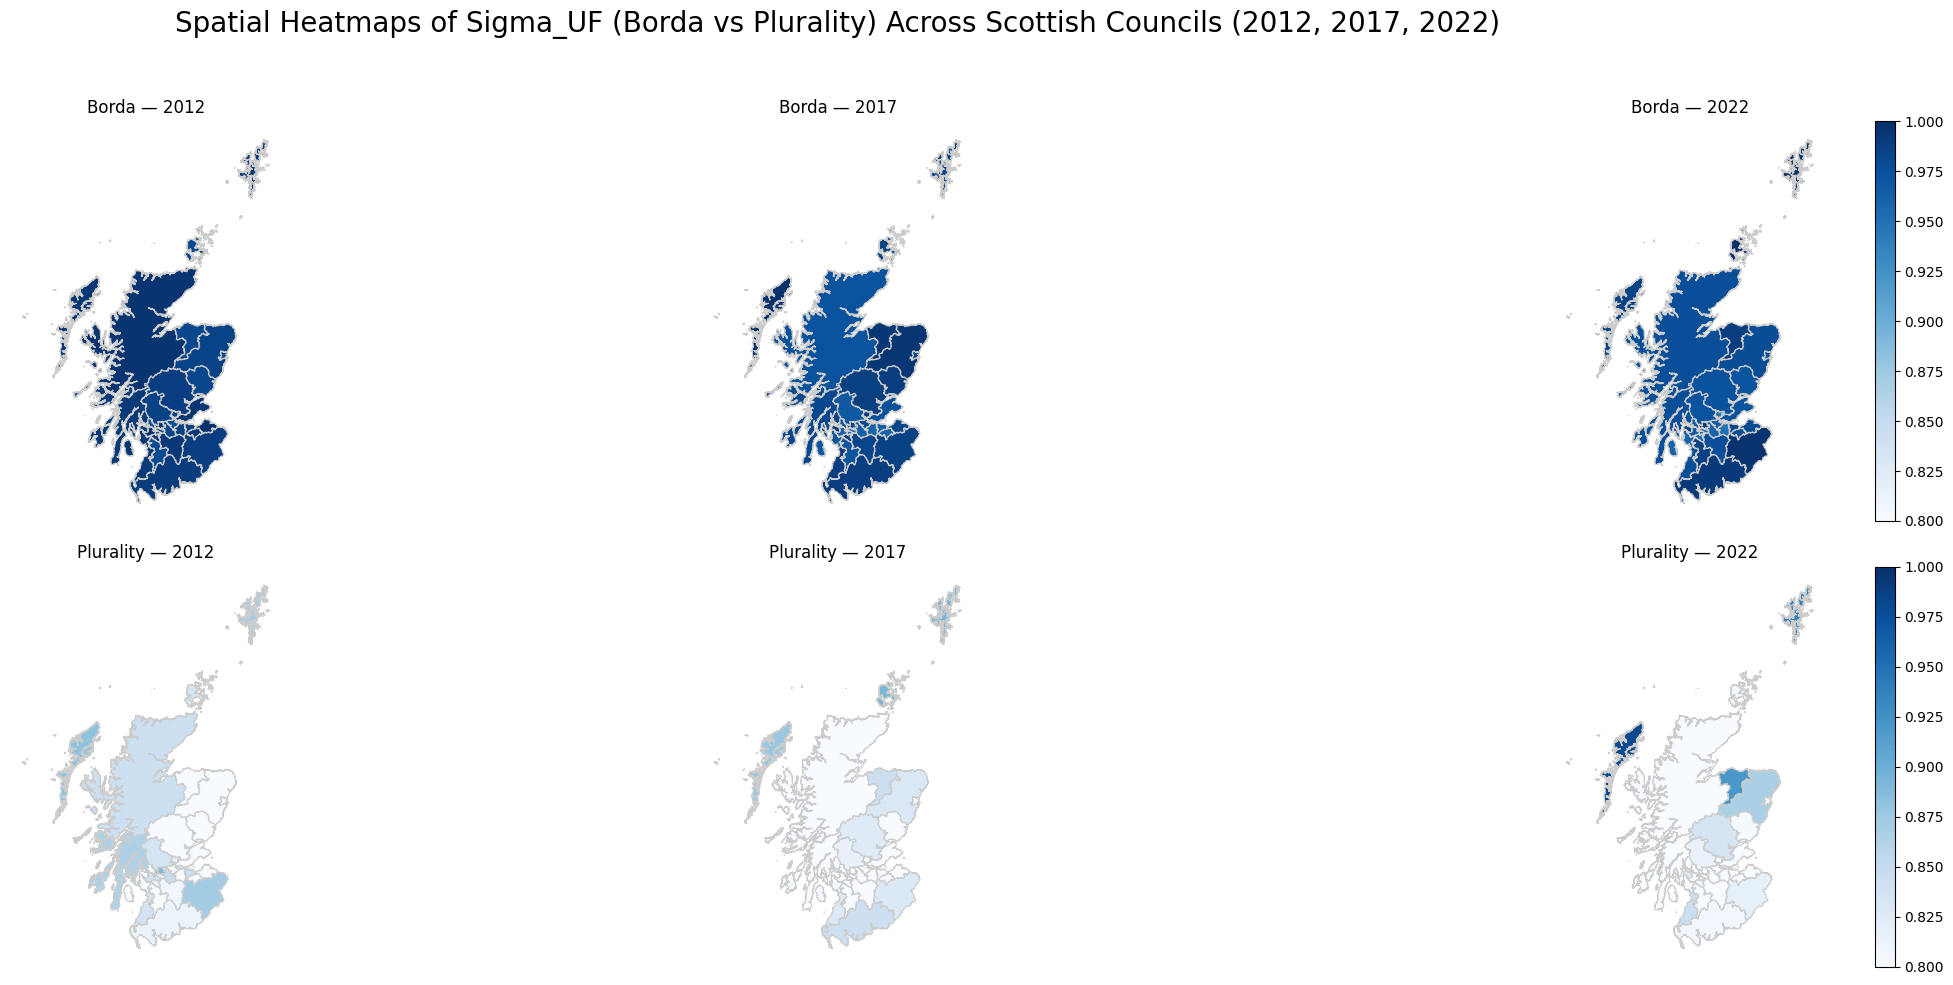

In [54]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 0. Load your main DataFrame
df = pd.read_csv('/Users/ss2776/Documents/Borda_Plurality_UF_Scottish.csv')# Assuming df is already loaded

# 1. Compute average Sigma_IIA values per Council-Year
council_year_avg = df.groupby(['Council', 'Year']).agg({
    'Sigma_UF_Borda': 'mean',
    'Sigma_UF_Plurality': 'mean'
}).reset_index()

# 2. Define mapping from short council codes to full names used in GeoJSON
name_map = {
    'aberdeen': 'Aberdeen City',
    'aberdeenshire': 'Aberdeenshire',
    'angus': 'Angus',
    'argyll_bute': 'Argyll and Bute',
    'clackmannanshire': 'Clackmannanshire',
    'dumgal': 'Dumfries and Galloway',
    'dundee': 'Dundee City',
    'east_ayrshire': 'East Ayrshire',
    'east_dunbartonshire': 'East Dunbartonshire',
    'east_lothian': 'East Lothian',
    'east_renfrewshire': 'East Renfrewshire',
    'edinburgh': 'City of Edinburgh',
    'eilean_siar': 'Eilean Siar',
    'falkirk': 'Falkirk',
    'fife': 'Fife',
    'glasgow': 'Glasgow City',
    'highland': 'Highland',
    'inverclyde': 'Inverclyde',
    'midlothian': 'Midlothian',
    'moray': 'Moray',
    'north_ayrshire': 'North Ayrshire',
    'north_lanarkshire': 'North Lanarkshire',
    'orkney': 'Orkney Islands',
    'perth_kinross': 'Perth and Kinross',
    'renfrewshire': 'Renfrewshire',
    'sc_borders': 'Scottish Borders',
    'shetland': 'Shetland Islands',
    'south_ayrshire': 'South Ayrshire',
    'south_lanarkshire': 'South Lanarkshire',
    'stirling': 'Stirling',
    'west_dunbartonshire': 'West Dunbartonshire',
    'west_lothian': 'West Lothian'
}

# 3. Expand Council-Year combinations to full grid
full_grid = pd.MultiIndex.from_product(
    [df['Council'].unique(), [2012, 2017, 2022]],  # Only years 2012, 2017, 2022
    names=['Council', 'Year']
).to_frame(index=False)

council_year_avg_full = full_grid.merge(
    council_year_avg,
    on=['Council', 'Year'],
    how='left'
)

council_year_avg_full['Full_Council_Name'] = council_year_avg_full['Council'].map(name_map)

# 4. Load the Scotland GeoJSON
gdf = gpd.read_file('/Users/ss2776/Downloads/lad.json')  # Adjust path if needed

# 5. Prepare years and metrics
years = [2012, 2017, 2022]
metrics = ['Sigma_UF_Borda', 'Sigma_UF_Plurality']

# 6. Set fixed vmin and vmax manually
vmin = 0.8
vmax = 1.0

# 7. Create 6-panel plot (2 rows x 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(24, 10))  # 2 rows (Borda/Plurality) × 3 columns (Years)

for i, metric in enumerate(metrics):  # Row: 0 = Borda, 1 = Plurality
    for j, year in enumerate(years):  # Column: Years
        # Filter fairness data for the year
        year_data = council_year_avg_full[council_year_avg_full['Year'] == year]

        # Merge with spatial data
        merged_gdf = gdf.merge(
            year_data,
            left_on='LAD13NM',
            right_on='Full_Council_Name',
            how='left'
        )

        # Plot
        ax = axs[i, j]
        merged_gdf.plot(
            column=metric,
            cmap='Blues',
            linewidth=0.8,
            edgecolor='0.8',
            legend=(j == 2),  # Show legend only on last column
            ax=ax,
            vmin=vmin,
            vmax=vmax
        )

        # Titles
        metric_name = 'Borda' if metric == 'Sigma_UF_Borda' else 'Plurality'
        ax.set_title(f'{metric_name} — {year}', fontsize=12)
        ax.axis('off')

# 8. Global title and layout
plt.suptitle('Spatial Heatmaps of Sigma_UF (Borda vs Plurality) Across Scottish Councils (2012, 2017, 2022)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle

# 9. Optional: Save to file
plt.savefig("Sigma_UF_Scotland_Heatmaps_2012_2017_2022_fixedscale.png", dpi=300, bbox_inches='tight')

plt.show()


Simulation Code and results for Bradley Terry


In [ ]:
import votekit.ballot_generator as bg
from votekit.pref_profile import PreferenceProfile
from votekit.pref_interval import PreferenceInterval
from fairness_metric import sigma_IIA, Sigma_UF
from Voting_rules import Ranked_Borda, Ranked_Plurality
import pandas as pd
import numpy as np
from tqdm import tqdm  

def simulate_BT_two_cases(
    num_profiles, 
    num_ballots, 
    candidate_range=(3, 11)
):
    """
    Simulate BT profiles under two conditions:
      1. Uniform strengths
      2. One dominant candidate (10x stronger)
      
    Args:
        num_profiles: number of profiles per candidate size per case
        num_ballots: number of ballots per profile
        candidate_range: (start, end) inclusive range of candidate counts
        
    Returns:
        A pandas DataFrame with all results
    """

    records = []

    # Wrap outer candidate loop with tqdm
    for num_cands in tqdm(range(candidate_range[0], candidate_range[1]), desc="Candidate sizes"):
        candidates = [chr(ord('A') + i) for i in range(num_cands)]

        for case in ["Uniform", "Dominant"]:
            # Assign strengths
            if case == "Uniform":
                strengths = np.ones(num_cands)  # [1, 1, ..., 1]
            elif case == "Dominant":
                strengths = np.ones(num_cands)
                strengths[0] = 10.0  # Candidate A much stronger
            
            pref_strengths = {cand: strength for cand, strength in zip(candidates, strengths)}

            # Set up BT model
            slate_to_candidates = {"Alpha": candidates}
            pref_intervals_by_bloc = {
                "Alpha": {
                    "Alpha": PreferenceInterval(pref_strengths)
                }
            }
            bloc_voter_prop = {"Alpha": 1}
            cohesion_parameters = {"Alpha": {"Alpha": 1}}

            bt_model = bg.slate_BradleyTerry(
                pref_intervals_by_bloc=pref_intervals_by_bloc,
                bloc_voter_prop=bloc_voter_prop,
                slate_to_candidates=slate_to_candidates,
                cohesion_parameters=cohesion_parameters
            )

            # Simulate profiles
            for _ in tqdm(range(num_profiles), leave=False, desc=f"Profiles ({case} case, {num_cands} cands)"):
                profile = bt_model.generate_profile(num_ballots)

                sigma_iia_plurality = sigma_IIA(profile, Ranked_Plurality)
                sigma_iia_borda = sigma_IIA(profile, Ranked_Borda)
                sigma_uf_plurality = sigma_UF(profile, Ranked_Plurality)
                sigma_uf_borda = sigma_UF(profile, Ranked_Borda)

                # Store
                records.append({
                    "Num_Candidates": num_cands,
                    "Case": case,
                    "Voting_Rule": "Plurality",
                    "Sigma_IIA": sigma_iia_plurality,
                    "Sigma_UF": sigma_uf_plurality,
                })
                records.append({
                    "Num_Candidates": num_cands,
                    "Case": case,
                    "Voting_Rule": "Borda",
                    "Sigma_IIA": sigma_iia_borda,
                    "Sigma_UF": sigma_uf_borda,
                })

    df = pd.DataFrame(records)
    return df


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fairness_boxplots(df, metric_name="Sigma_IIA", case="Uniform"):
    """
    Plot boxplots of fairness metric for Borda and Plurality rules by number of candidates.
    
    Args:
        df (pd.DataFrame): DataFrame with simulation results.
        metric_name (str): Either "Sigma_IIA" or "Sigma_UF" or "Combined_Score".
        case (str): "Uniform" or "Dominant" (to select the experimental setting).
    """
    plt.figure(figsize=(12, 6))

    # Filter for the selected case
    df_case = df[df["Case"] == case]

    # Prepare boxplot data
    plurality_data = [
        df_case[(df_case["Voting_Rule"] == "Plurality") & 
                (df_case["Num_Candidates"] == n)][metric_name].dropna()
        for n in range(3, 11)
    ]
    
    borda_data = [
        df_case[(df_case["Voting_Rule"] == "Borda") & 
                (df_case["Num_Candidates"] == n)][metric_name].dropna()
        for n in range(3, 11)
    ]
    
    # Set positions
    positions_plurality = np.array(range(3, 11)) - 0.15
    positions_borda = np.array(range(3, 11)) + 0.15

    # Plot boxplots
    plt.boxplot(
        plurality_data,
        positions=positions_plurality,
        widths=0.25,
        patch_artist=True,
        boxprops=dict(facecolor="blue"),
        medianprops=dict(color="black"),
        whis=[1, 99],
        showfliers=False
    )
    
    plt.boxplot(
        borda_data,
        positions=positions_borda,
        widths=0.25,
        patch_artist=True,
        boxprops=dict(facecolor="green"),
        medianprops=dict(color="black"),
        whis=[1, 99],
        showfliers=False
    )

    # Plot settings
    plt.xticks(range(3, 11), labels=[str(n) for n in range(3, 11)])
    plt.xlabel("Number of Candidates", fontsize=14)
    plt.ylabel(metric_name, fontsize=14)
    plt.title(f"{metric_name} by Voting Rule ({case} Case)", fontsize=16)
    plt.grid(True)
    
    # Custom legend
    import matplotlib.patches as mpatches
    plurality_patch = mpatches.Patch(color="blue", label="Plurality")
    borda_patch = mpatches.Patch(color="green", label="Borda")
    plt.legend(handles=[plurality_patch, borda_patch], loc="best")

    plt.tight_layout()
    plt.show()
